J. Manuel Garcia FIFA Player Potential Predictor

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model 
from scipy.stats import skew
import numpy as np
%matplotlib inline

Get access to our google drive folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/IA'
!ls

/content/drive/MyDrive/IA
 CompleteDataset.csv	   Datalol.csv			   Untitled
 CompleteDatasetFIFA.csv  'FIFA Linear Regression.ipynb'   Untitled0.ipynb
 CSPM_Predictor.ipynb	   Linear_Regression.ipynb


Dataset visualization

In [ ]:
dataFIFA = pd.read_csv('CompleteDatasetFIFA.csv')
dataFIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15952 entries, 0 to 15951
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           15952 non-null  int64  
 1   Overall       15952 non-null  int64  
 2   Potential     15952 non-null  int64  
 3   Acceleration  15952 non-null  float64
 4   Agility       15952 non-null  float64
 5   Balance       15952 non-null  float64
 6   Ball control  15952 non-null  float64
 7   Reactions     15952 non-null  float64
 8   Stamina       15952 non-null  float64
 9   Strength      15952 non-null  float64
 10  Vision        15952 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 1.3 MB


Dataset correlations

In [ ]:
dataFIFA.corr()

,Age,Overall,Potential,Acceleration,Agility,Balance,Ball control,Reactions,Stamina,Strength,Vision
Age,1.000000,0.462062,-0.228583,-0.187989,-0.010481,-0.080641,0.250885,0.466492,0.206724,0.340734,0.246319
Overall,0.462062,1.000000,0.675489,0.171659,0.251199,0.061452,0.704749,0.837029,0.455517,0.345676,0.508824
Potential,-0.228583,0.675489,1.000000,0.244556,0.224871,0.112374,0.529906,0.510583,0.241944,0.089749,0.345994
Acceleration,-0.187989,0.171659,0.244556,1.000000,0.717602,0.581087,0.379364,0.130860,0.280421,-0.359738,0.297460
Agility,-0.010481,0.251199,0.224871,0.717602,1.000000,0.704568,0.547163,0.252505,0.280135,-0.425947,0.508653
Balance,-0.080641,0.061452,0.112374,0.581087,0.704568,1.000000,0.364259,0.096786,0.146007,-0.601603,0.381947
Ball control,0.250885,0.704749,0.529906,0.379364,0.547163,0.364259,1.000000,0.630043,0.335874,-0.046140,0.764664
Reactions,0.466492,0.837029,0.510583,0.130860,0.252505,0.096786,0.630043,1.000000,0.425478,0.267727,0.509723
Stamina,0.206724,0.455517,0.241944,0.280421,0.280135,0.146007,0.335874,0.425478,1.000000,0.237910,0.280732
Strength,0.340734,0.345676,0.089749,-0.359738,-0.425947,-0.601603,-0.046140,0.267727,0.237910,1.000000,-0.138951


By hand implementation

In [ ]:
class Lrbh():
  def __init__(self, X, y):
    self.learningR = 0.03
    self.epochs = 1500
    self.n_samples = len(y)
    self.n_features = np.size(X, 1)
    
  
  # Data Normalization
    self.X = np.hstack((np.ones((self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
    self.y = y[:,np.newaxis]

    self.params = np.zeros((self.n_features + 1, 1))

  ## Fit model
  def fit(self):
    for i in range(self.epochs):
      self.params = self.params - (self.learningR/self.n_samples) * self.X.T @ (self.X @ self.params - self.y)
      
    self.intercept_ = self.params[0]
    self.coef_ = self.params[1:] 

    return self

  # Training
  def score(self, X, y):
    if X is not None:
      n_samples = np.size(X, 0)
      X = np.hstack((np.ones((n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
    else:
      X = self.X
    
    if y is not None:
      y = y[:,np.newaxis]
    else:
      y = self.y

    hyp = X @ self.params
    
    return 1 - (((y - hyp)**2).sum() / ((y - y.mean())**2).sum())
   
    
  
  def predict(self, X):
    n_samples = np.size(X, 0)
    
    return np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) / np.std(X, 0))) @ self.params
  
  
  def get_params(self):
    return self.params   


By hand vs Framework results

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score


X = dataFIFA[['Age', 'Overall', 'Acceleration', 'Agility', 'Balance', 'Ball control', 'Reactions', 'Stamina', 'Strength', 'Vision']].to_numpy()
y = dataFIFA.Potential.to_numpy()


X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state = 42)

by_hand = Lrbh(X_train, y_train).fit()
framework = LinearRegression().fit(X_train, y_train)



by_hand_training = by_hand.score(None, None)
framework_training = framework.score(X_train, y_train)


by_hand_testing = by_hand.score(X_test, y_test)
framework_testing = framework.score(X_test, y_test)
acc = cross_val_score(framework, X, y)
y_ = by_hand.predict(X_test)

print('Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test,y_)))
print("------------------")
print('Accuracy Framework in training: %.4f' % framework_training)
print('Accuracy By hand in training: %.4f ' % by_hand_training)
print("------------------")
print('Accuracy Framework in testing: %.4f' % framework_testing)
print('Accuracy By hand: in testing: %.4f ' % by_hand_testing)
print("------------------")
print('Mean Cross Validation Score: %.2f' % np.mean(acc))





Mean Squared Error: 2.433
------------------
Accuracy Framework in training: 0.8381
Accuracy By hand in training: 0.8381 
------------------
Accuracy Framework in testing: 0.8360
Accuracy By hand: in testing: 0.8352 
------------------
Mean Cross Validation Score: 0.84


Visualization of our final model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


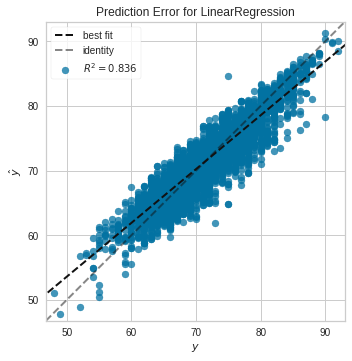

In [ ]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(framework).fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

Queries

In [ ]:
print("PLEASE ENTER PLAYER INFORMATION")
Age = float(input("Age "))
Overall = float(input("Overall "))
Acceleration = float(input("Acceleration "))
Agility = float(input("Agility "))
Balance = float(input("Balance "))
Ball_control = float(input("Ball control "))
Reactions = float(input("Reactions "))
Stamina = float(input("Stamina "))
Strength = float(input("Strength "))
Vision = float(input("Vision "))

testpredict = framework.predict([[Age, Overall, Acceleration, Agility, Balance, Ball_control, Reactions, Stamina, Strength, Vision]])
print("Your player potential is: %.17f" % testpredict)


PLEASE ENTER PLAYER INFORMATION
Age 25
Overall 83
Acceleration 75
Agility 86
Balance 80
Ball control 84
Reactions 81
Stamina 76
Strength 36
Vision 83
Your player potential is: 86.8
